In [9]:
%ls

colab_RF_CIs_on_fingerprints_initial.ipynb
colab_grid_search_pipeline.ipynb
get_ecfp4_ecfp6_final.ipynb
get_original_id_smile_target_esol.ipynb
get_original_id_smile_target_freeesolv.ipynb
get_original_id_smile_target_lipophilicity.ipynb
get_protenated_from_canonical.ipynb
get_rdkit_descriptors_final.ipynb
grid_search_results_visualised.ipynb


In [13]:
%ls ../backup_results/

esol_original_random_search_best_cv_scores_0.json
esol_original_random_search_best_params_0.json
esol_original_random_search_best_test_score_0.json
freesolv_original_random_search_best_cv_scores_0.json
freesolv_original_random_search_best_params_0.json
freesolv_original_random_search_best_test_score_0.json


In [73]:
import pickle
import json

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# root = '../backup_results'
root = '../results'
dataset = 'freesolv'
smile_type = 'original'

In [75]:
with open(f'../results/{dataset}_{smile_type}_random_search_best_cv_scores.pickle', 'rb') as fp:
    cv_scores = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_random_search_best_test_score.pickle', 'rb') as fp:
    test_score = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_random_search_best_params.pickle', 'rb') as fp:
    best_params = pickle.load(fp)

with open(f'../results/{dataset}_{smile_type}_random_search_grid_params.pickle', 'rb') as fp:
    params = pickle.load(fp)

In [76]:
# with open(f'{root}/{dataset}_{smile_type}_random_search_best_params.json', 'r') as f:
#     best_params = json.load(f)

# with open(f'{root}/{dataset}_{smile_type}_random_search_best_cv_scores.json', 'r') as f:
#     cv_scores = json.load(f)
    
# with open(f'{root}/{dataset}_{smile_type}_random_search_best_test_score.json', 'r') as f:
#     test_score = json.load(f)

In [77]:
best_params['RDKit']

{'rf': {'rf__n_estimators': 700, 'rf__max_features': 0.8},
 'xgb': {'xgb__subsample': 1,
  'xgb__n_estimators': 200,
  'xgb__max_depth': 3,
  'xgb__learning_rate': 0.1},
 'krr': {'krr__alpha': 100}}

In [78]:
column_order = ['RDKit',
                '1024ecfp-4', '1024ecfp-4 + RDKit',
                '1024ecfp-6', '1024ecfp-6 + RDKit',
                '2048ecfp-4', '2048ecfp-4 + RDKit',
                '2048ecfp-6', '2048ecfp-6 + RDKit']

row_order = ['Kernel Ridge','Random Forest', 'XGBoost', ]
mapper = {
    'krr': 'Kernel Ridge',
    'xgb': 'XGBoost',
    'rf': 'Random Forest',
}

In [88]:
## pull out validation scores for all features for all models (validation set is a test set when working on train/val split )
train_rmse = - pd.DataFrame({features: {model: test_score[features][model]['train_RMSE'].mean() for model in cv_scores[features]} for features in cv_scores})
train_rmse.round(2)

,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,0.43,0.72,0.77,0.73,0.75,0.46,0.45,0.46,0.44
xgb,0.27,0.68,0.67,0.14,1.04,0.11,0.12,0.11,0.12
krr,3.90,3.85,3.84,3.83,3.82,3.80,3.81,3.80,3.80


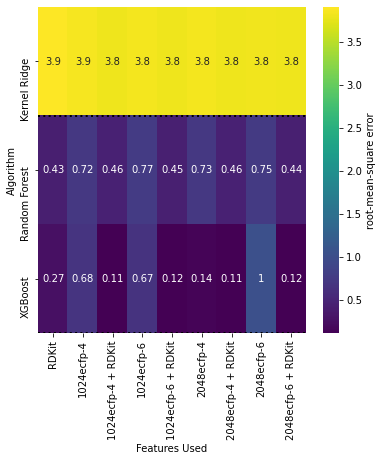

In [89]:
df = train_rmse.round(2)
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]

fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.heatmap(df, annot=True, cmap='viridis', cbar_kws={'label': r"root-mean-square error"}, ax=ax)

ax.set_ylabel('Algorithm')
ax.set_xlabel('Features Used')
ax.hlines([1, 3, 5, 7], *ax.get_xlim(), linestyle=':', linewidth=2)
# fig.savefig('../figures/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')

In [90]:
## pull out validation scores for all features for all models (validation set is a test set when working on train/val split )
val_rmse = - pd.DataFrame({features: {model: cv_scores[features][model]['test_RMSE'].mean() for model in cv_scores[features]} for features in cv_scores})
val_rmse.round(2)

,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,1.01,2.08,2.09,2.07,2.13,1.05,1.00,1.02,0.99
xgb,0.81,1.94,1.89,1.90,1.93,0.87,0.87,0.84,0.90
krr,4.02,4.75,4.31,4.81,4.71,3.86,3.94,4.05,4.06


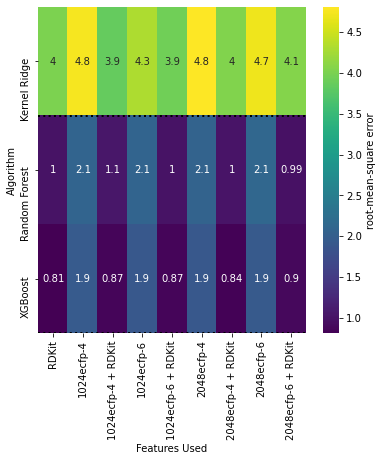

In [91]:
df = val_rmse.round(2)
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]

fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.heatmap(df, annot=True, cmap='viridis', cbar_kws={'label': r"root-mean-square error"}, ax=ax)

ax.set_ylabel('Algorithm')
ax.set_xlabel('Features Used')
ax.hlines([1, 3, 5, 7], *ax.get_xlim(), linestyle=':', linewidth=2)
# fig.savefig('../figures/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')

In [92]:
## pull out validation scores for all features for all models (validation set is a test set when working on train/val split )
test_rmse = - pd.DataFrame({features: {model: test_score[features][model]['test_RMSE'].mean() for model in cv_scores[features]} for features in cv_scores})
test_rmse.round(2)

,RDKit,1024ecfp-4,1024ecfp-6,2048ecfp-4,2048ecfp-6,1024ecfp-4 + RDKit,1024ecfp-6 + RDKit,2048ecfp-4 + RDKit,2048ecfp-6 + RDKit
rf,0.97,2.74,2.72,2.74,2.71,1.13,1.10,1.10,1.06
xgb,0.78,2.55,2.36,2.17,2.44,0.86,1.00,0.98,0.99
krr,3.86,5.20,4.87,4.97,4.75,4.16,3.98,3.95,3.98


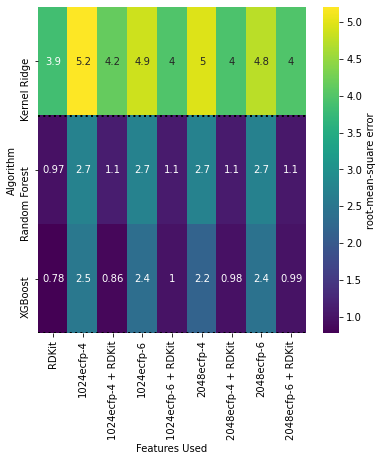

In [93]:
df = test_rmse.round(2)
df = df.rename(mapper=mapper, axis='rows')
df = df.loc[row_order, column_order]

fig, ax = plt.subplots(1,1,figsize=(6,6))
sns.heatmap(df, annot=True, cmap='viridis', cbar_kws={'label': r"root-mean-square error"}, ax=ax)

ax.set_ylabel('Algorithm')
ax.set_xlabel('Features Used')
ax.hlines([1, 3, 5, 7], *ax.get_xlim(), linestyle=':', linewidth=2)
# fig.savefig('../figures/algorithm_comparison.jpg', dpi=350, bbox_inches='tight')